In [1]:
# importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data cleaning and checking null values

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data["Cabin"].fillna('Missing',inplace=True)

In [9]:
data['Cabin']=data['Cabin'].astype(str).str[0]

In [10]:
data['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [11]:
data['Embarked']=data['Embarked'].fillna("S")

In [12]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
data.drop(columns=['Name','Ticket'], inplace=True)

In [16]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,M,S
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,M,S
3,4,1,1,female,35.0,1,0,53.1000,C,S
4,5,0,3,male,35.0,0,0,8.0500,M,S


# data transformation

In [17]:
from sklearn import preprocessing

In [18]:
label_encoder = preprocessing.LabelEncoder()

In [19]:
data['Sex']= label_encoder.fit_transform(data['Sex'])
data['Cabin']= label_encoder.fit_transform(data['Cabin'])
data['Embarked']= label_encoder.fit_transform(data['Embarked'])

In [20]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,7,2
1,2,1,1,0,38.0,1,0,71.2833,2,0
2,3,1,3,0,26.0,0,0,7.9250,7,2
3,4,1,1,0,35.0,1,0,53.1000,2,2
4,5,0,3,1,35.0,0,0,8.0500,7,2


# data visualization

In [21]:
def bar_chart(feature):
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 0    233
1    109
Name: Sex, dtype: int64
Dead:
 1    468
0     81
Name: Sex, dtype: int64


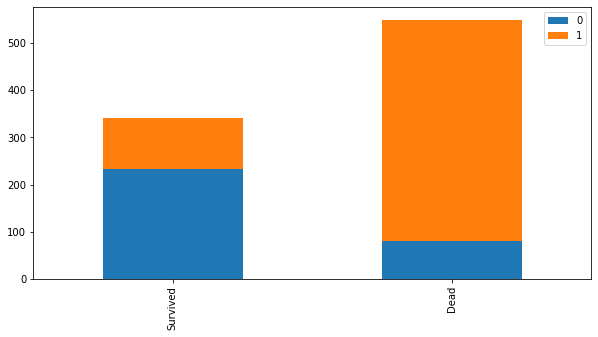

In [22]:
bar_chart('Sex')
print("Survived :\n",data[data['Survived']==1]['Sex'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Sex'].value_counts())

## women have survived more

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


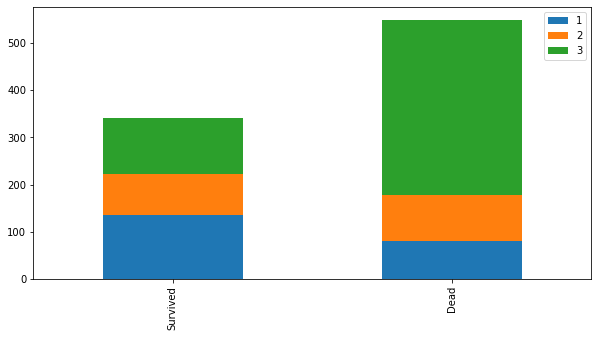

In [23]:
bar_chart('Pclass')
print("Survived :\n",data[data['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Pclass'].value_counts())

### The Chart confirms 1st class more likely survivied than other classes.
### The Chart confirms 3rd class more likely dead than other classes

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


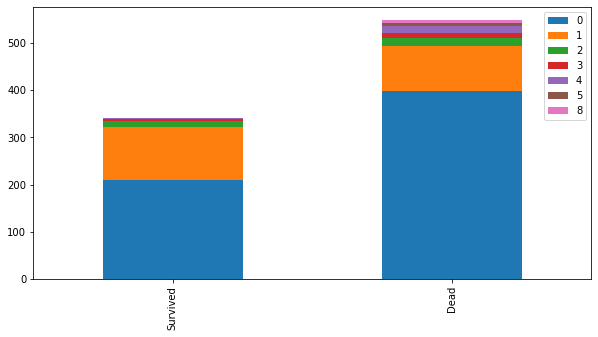

In [24]:
bar_chart('SibSp')
print("Survived :\n",data[data['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",data[data['Survived']==0]['SibSp'].value_counts())

### The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived.
### The Chart confirms a person aboarded without siblings or spouse more likely dead

Survived :
 2    219
0     93
1     30
Name: Embarked, dtype: int64
Dead:
 2    427
0     75
1     47
Name: Embarked, dtype: int64


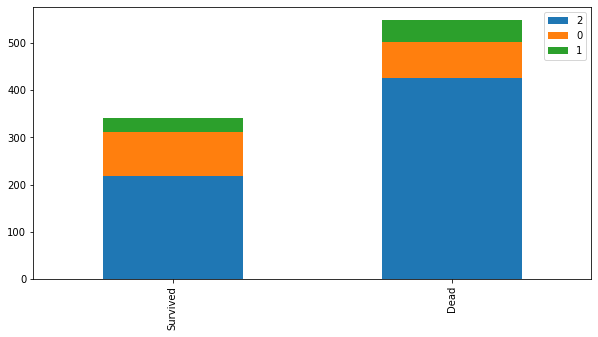

In [25]:
bar_chart('Embarked')
print("Survived :\n",data[data['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Embarked'].value_counts())

### The Chart confirms a person aboarded from C slightly more likely survived.
### The Chart confirms a person aboarded from Q more likely dead.
### The Chart confirms a person aboarded from S more likely dead.

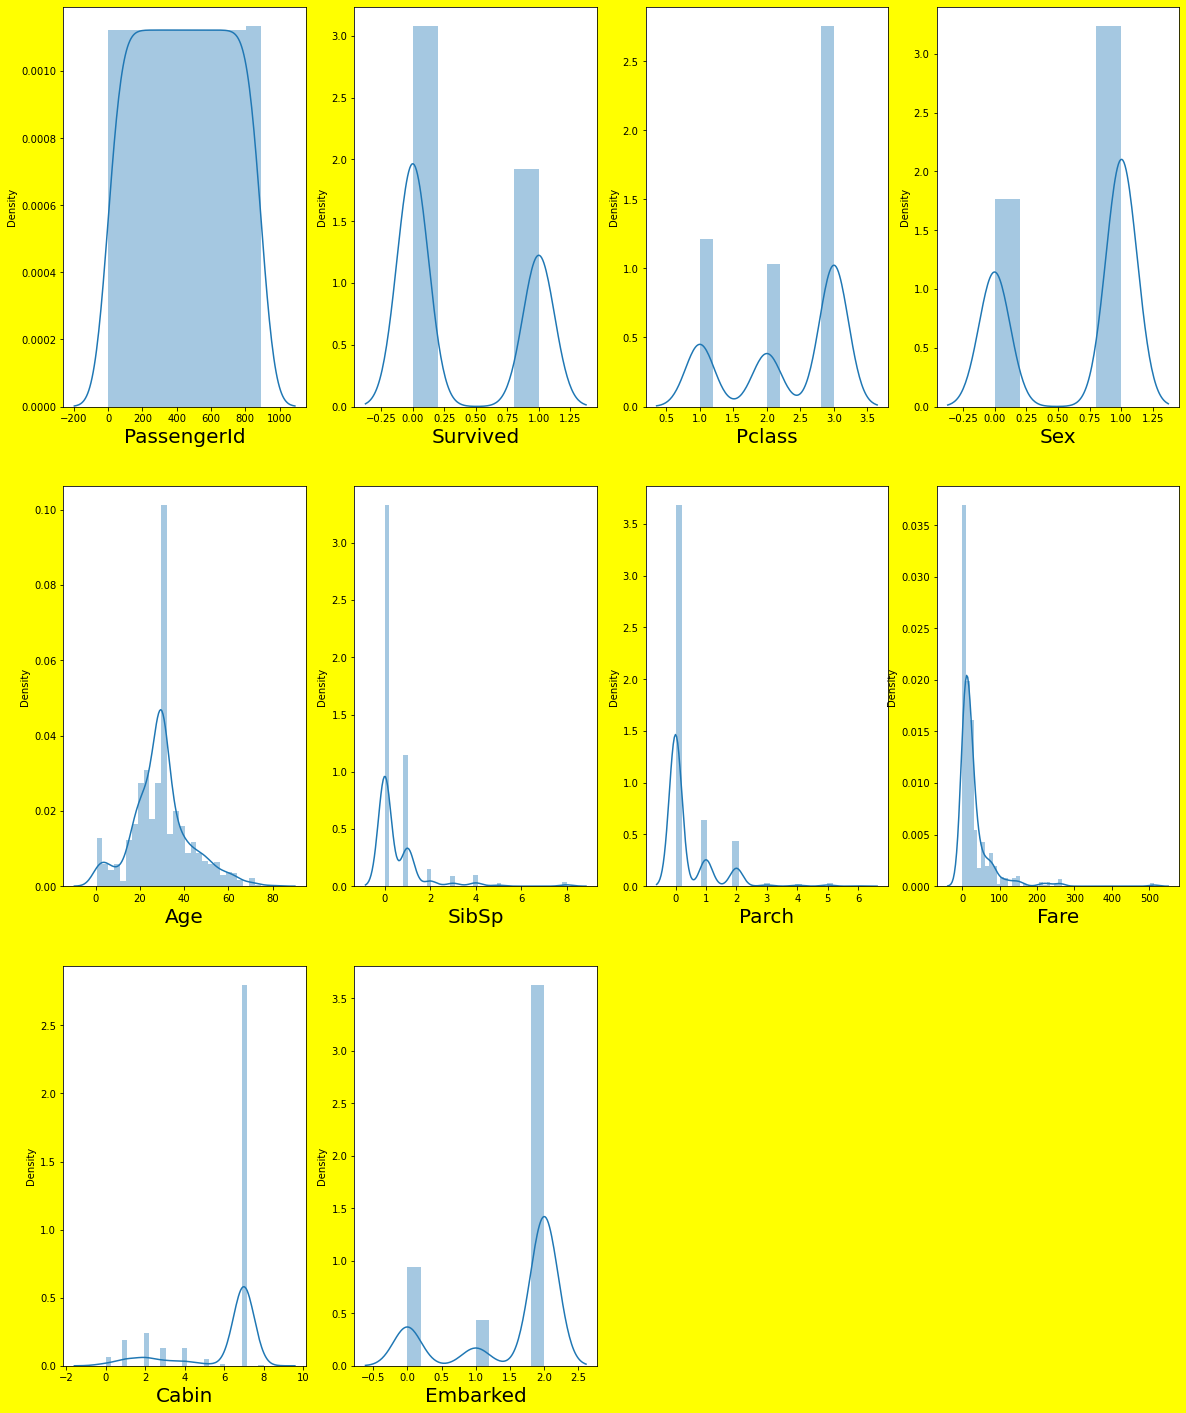

In [26]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for column in data:
    if plotnumber <=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

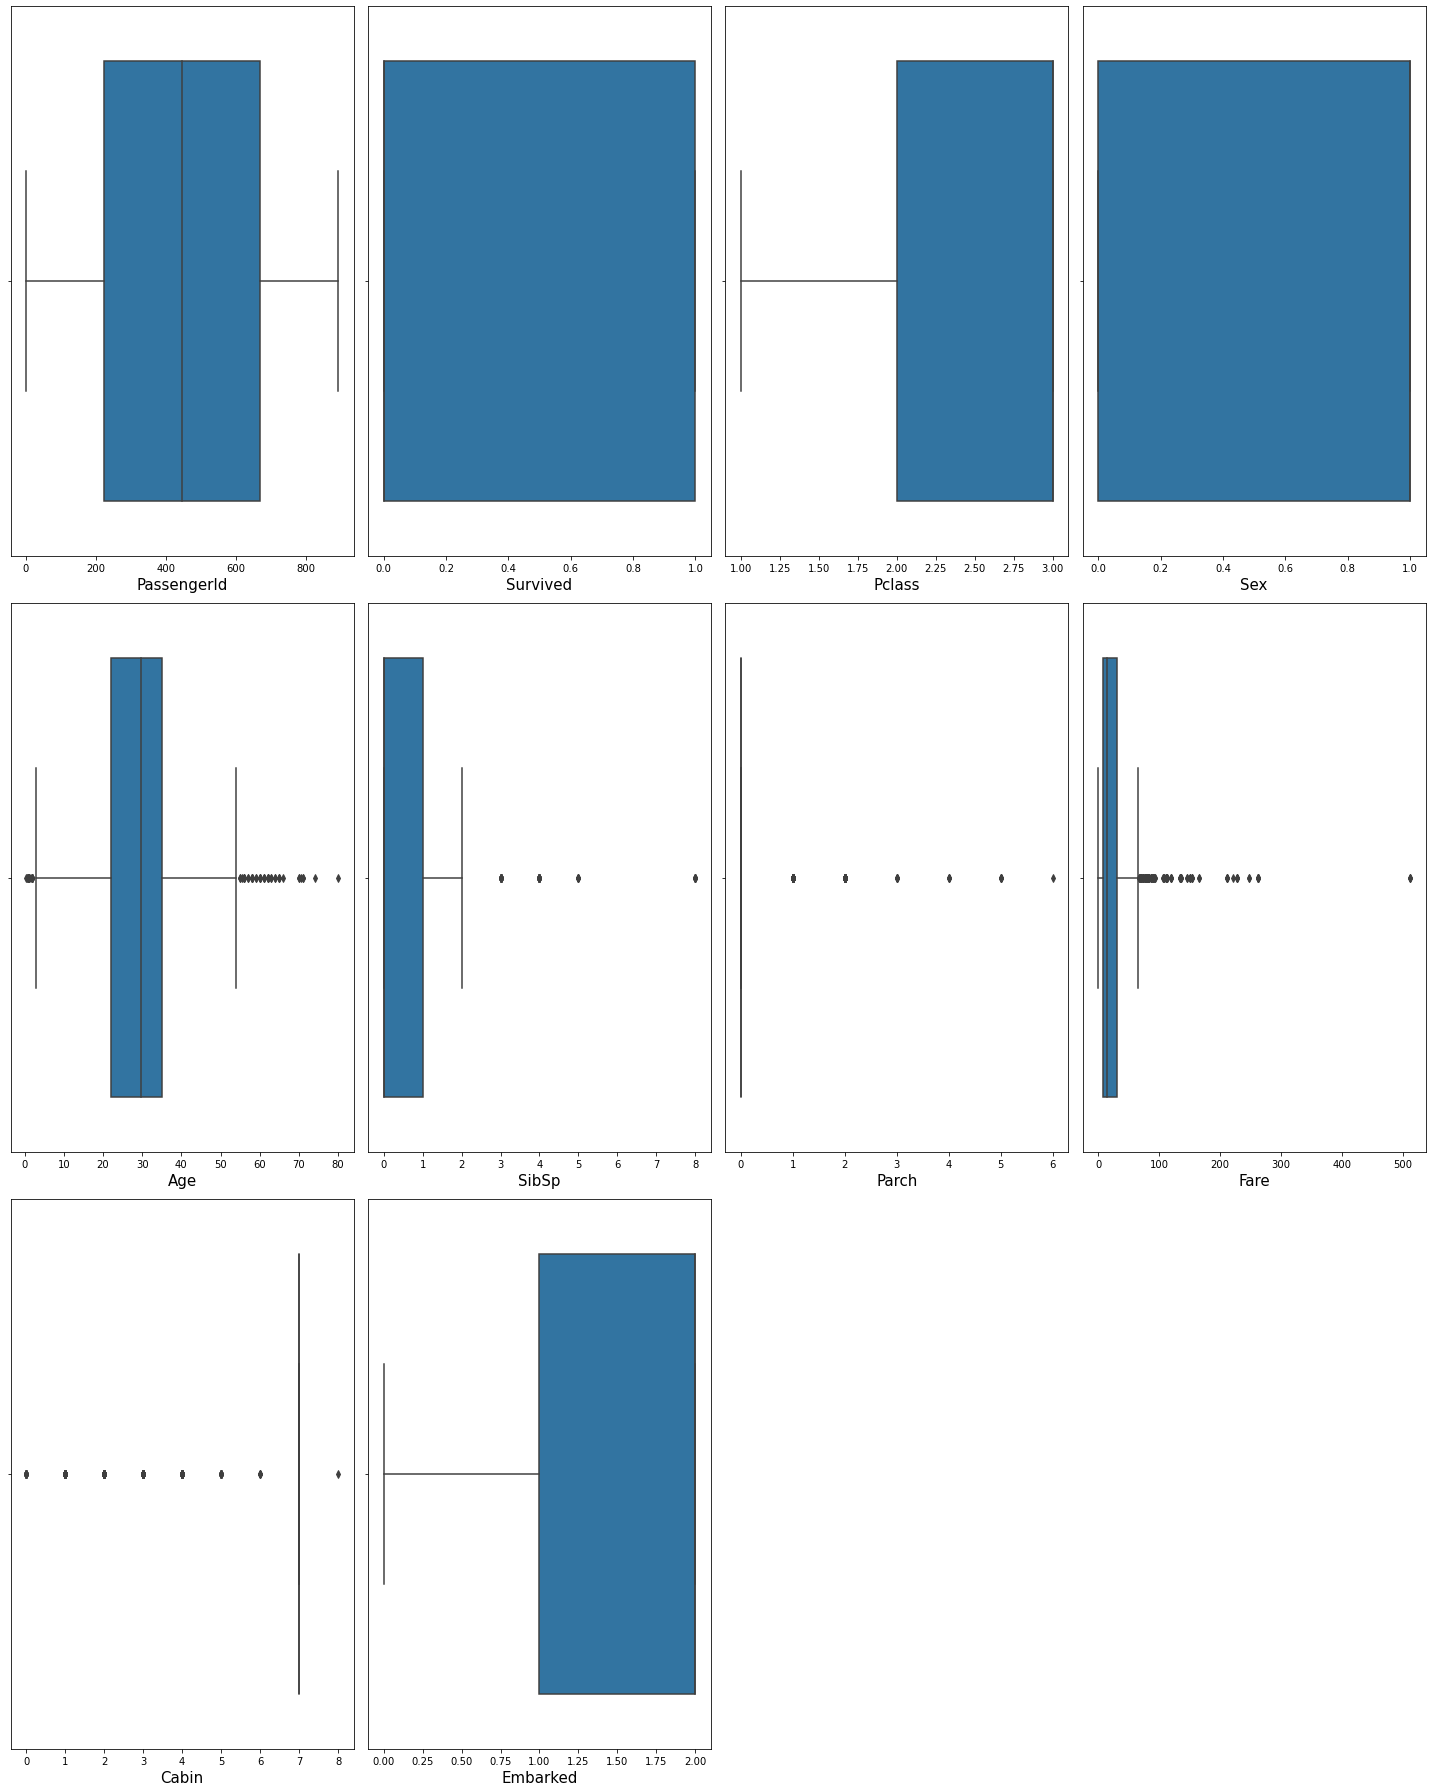

In [27]:
plt.figure(figsize=(20,25))
plotnumber=1


for column in data:
    if plotnumber<=10:
        plt.subplot(3,4,plotnumber)
        ax=sns.boxplot(data[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

# removing Outliers

In [28]:
#1st quantile 
q1= data.quantile(0.25)
#3rd quantile
q3=data.quantile(0.75)
#IQR
iqr=q3-q1

In [29]:
ages=(q3.Age + (1.5*iqr.Age))
print(ages)   

index=np.where(data['Age']> ages)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

54.5
(849, 10)


,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,0,3,1,22.000000,1,0,7.2500,7,2
1,1,2,1,1,0,38.000000,1,0,71.2833,2,0
2,2,3,1,3,0,26.000000,0,0,7.9250,7,2
3,3,4,1,1,0,35.000000,1,0,53.1000,2,2
4,4,5,0,3,1,35.000000,0,0,8.0500,7,2
...,...,...,...,...,...,...,...,...,...,...,...
844,886,887,0,2,1,27.000000,0,0,13.0000,7,2
845,887,888,1,1,0,19.000000,0,0,30.0000,1,2
846,888,889,0,3,0,29.699118,1,2,23.4500,7,2
847,889,890,1,1,1,26.000000,0,0,30.0000,2,0


In [30]:
fares=(q3.Fare + (1.5*iqr.Fare))
print(fares)   

index=np.where(data['Fare']>fares)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

65.6344
(743, 10)


,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,0,3,1,22.000000,1,0,7.2500,7,2
1,2,3,1,3,0,26.000000,0,0,7.9250,7,2
2,3,4,1,1,0,35.000000,1,0,53.1000,2,2
3,4,5,0,3,1,35.000000,0,0,8.0500,7,2
4,5,6,0,3,1,29.699118,0,0,8.4583,7,1
...,...,...,...,...,...,...,...,...,...,...,...
738,886,887,0,2,1,27.000000,0,0,13.0000,7,2
739,887,888,1,1,0,19.000000,0,0,30.0000,1,2
740,888,889,0,3,0,29.699118,1,2,23.4500,7,2
741,889,890,1,1,1,26.000000,0,0,30.0000,2,0


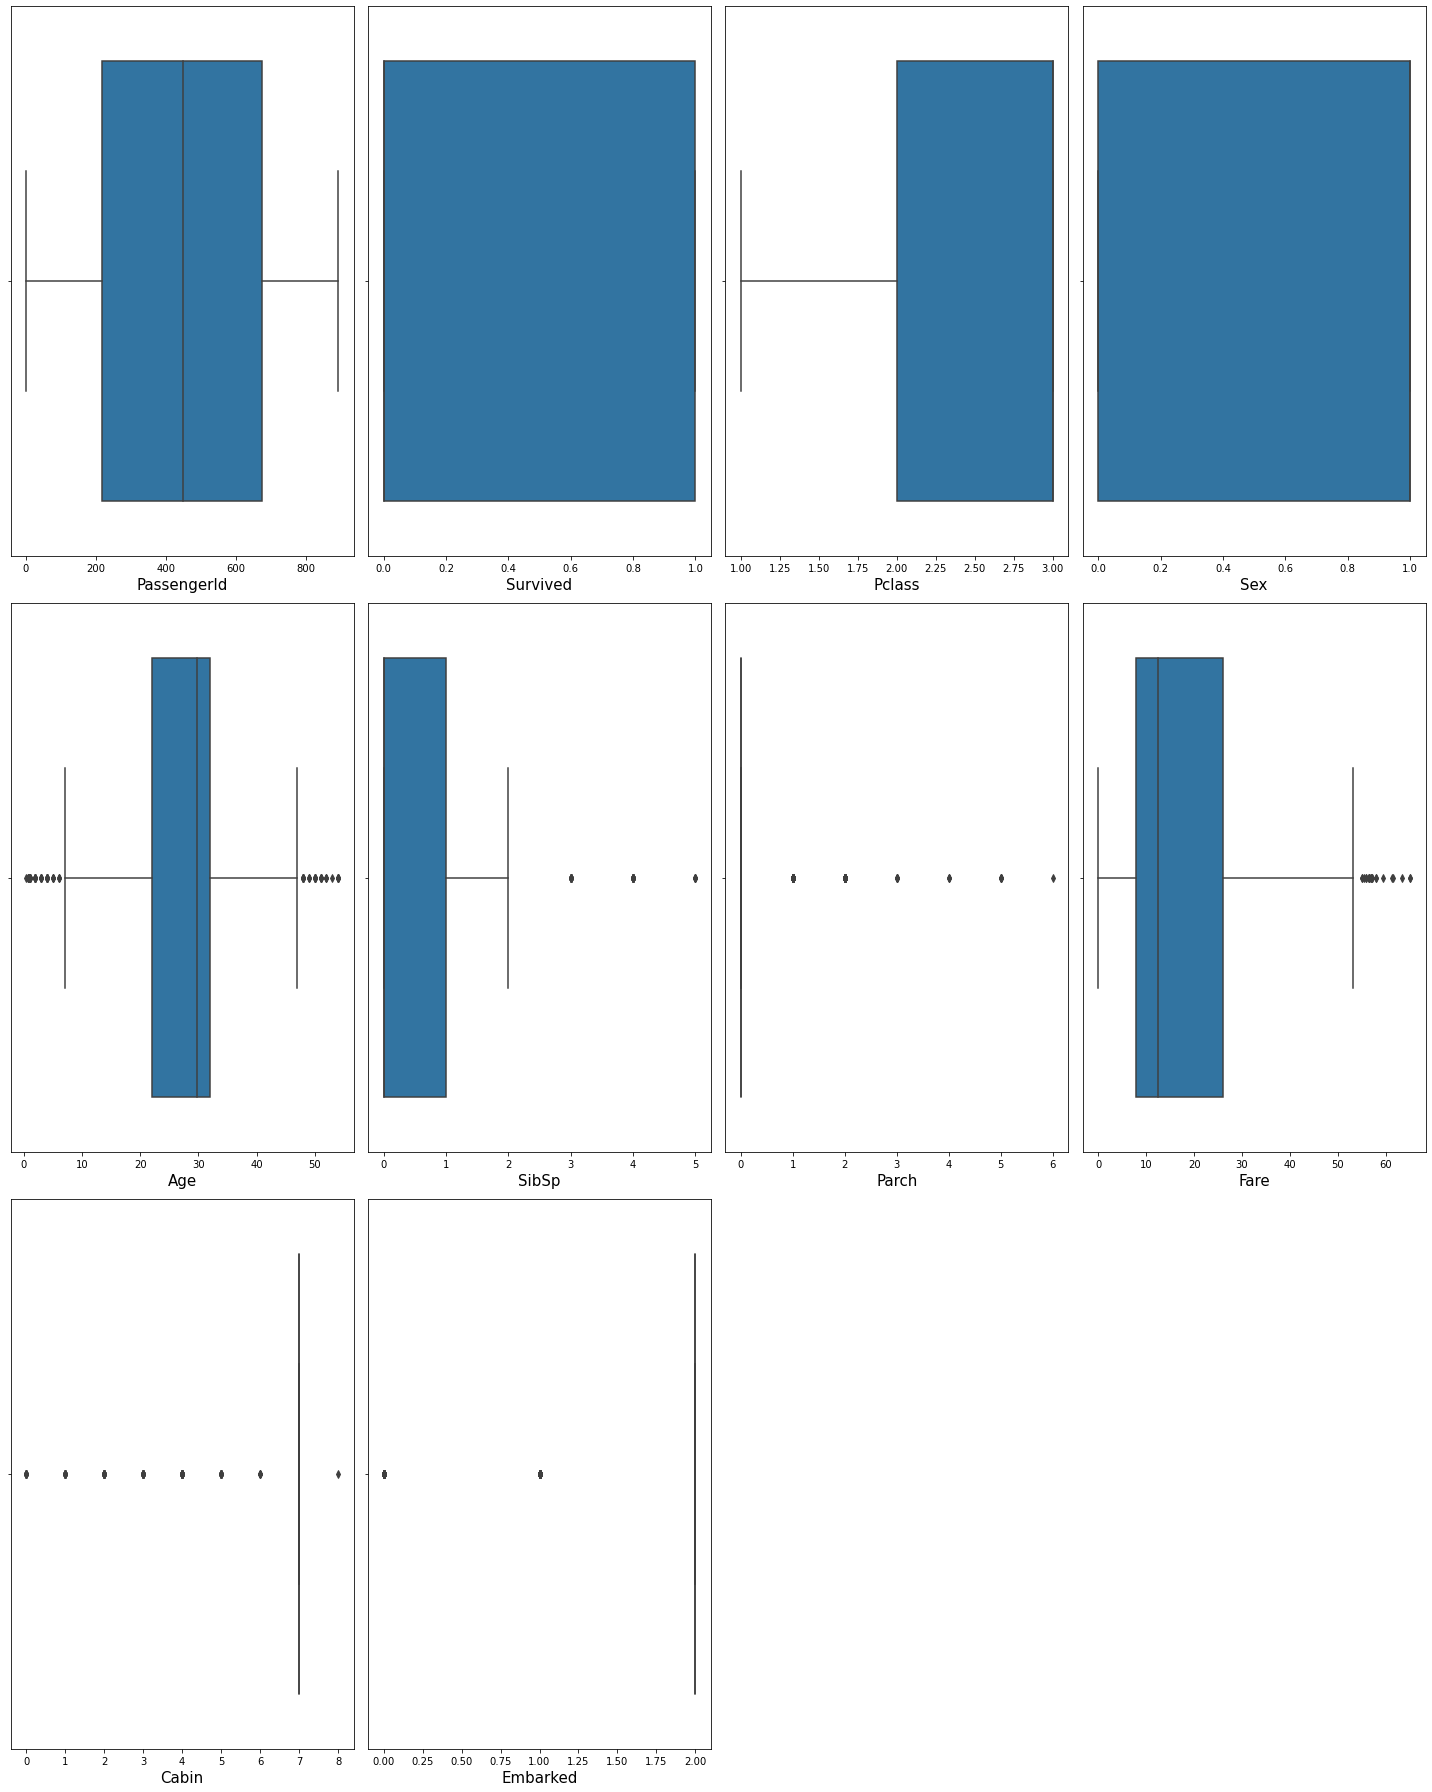

In [31]:
plt.figure(figsize=(20,25))
plotnumber=1


for column in data:
    if plotnumber<=10:
        plt.subplot(3,4,plotnumber)
        ax=sns.boxplot(data[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

In [32]:
# Separate feature variables and target variable
X = data.drop(['Survived'], axis = 1)

Y= data['Survived']


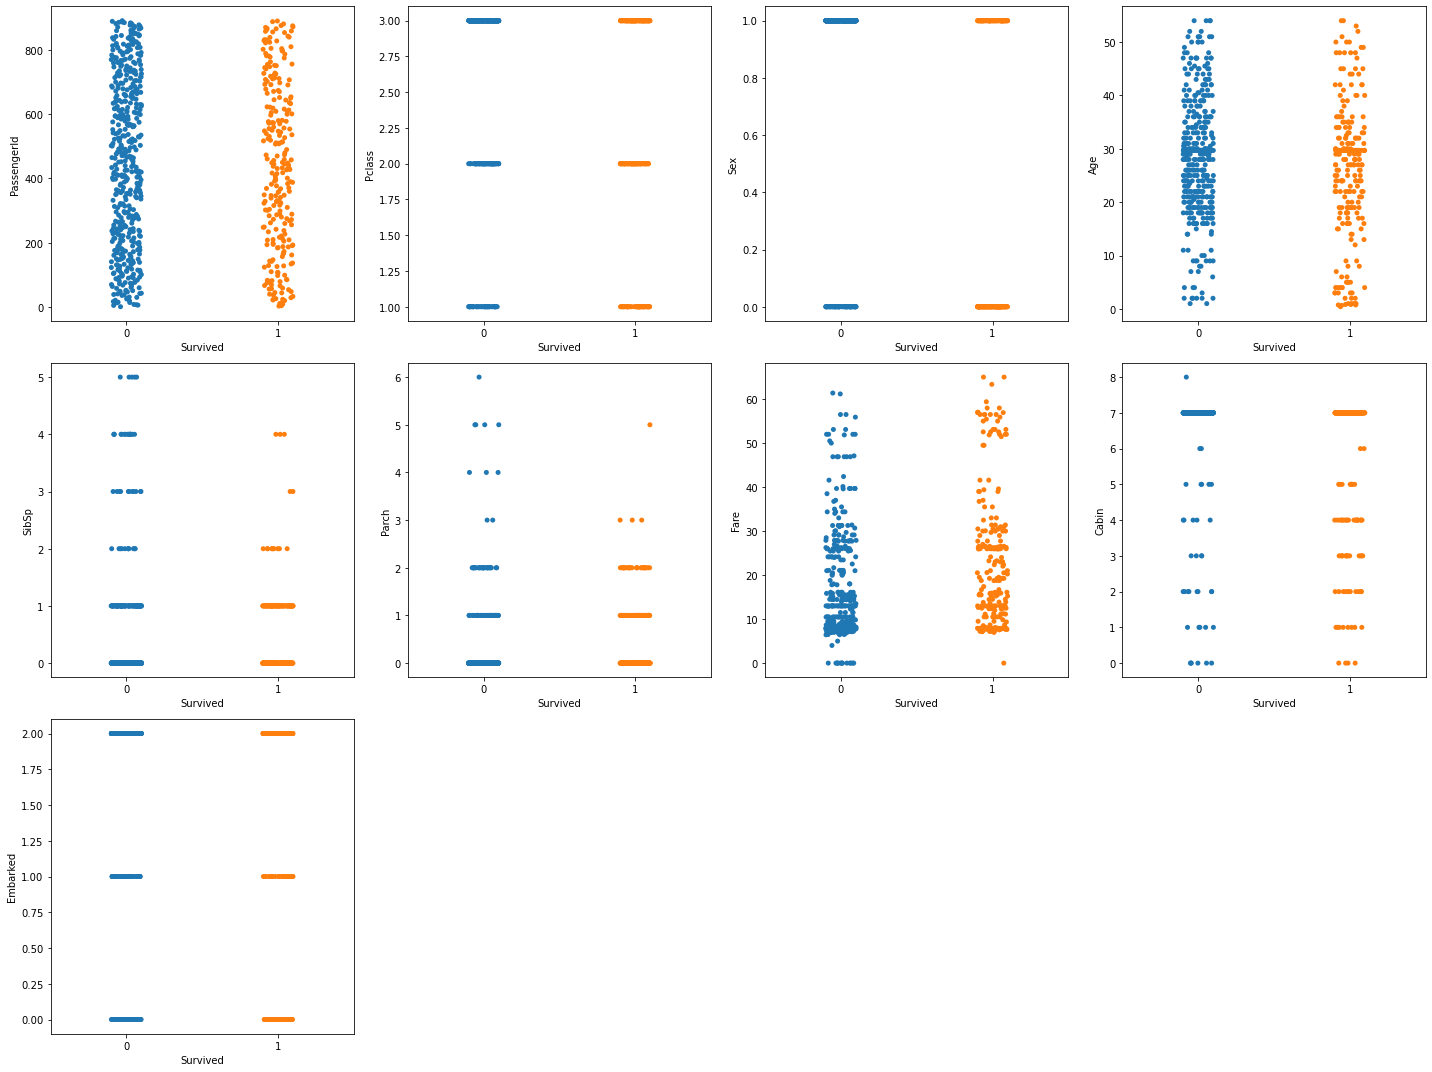

In [33]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in X :
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.stripplot(Y,X[column])
        
    plotnumber+=1
plt.tight_layout()

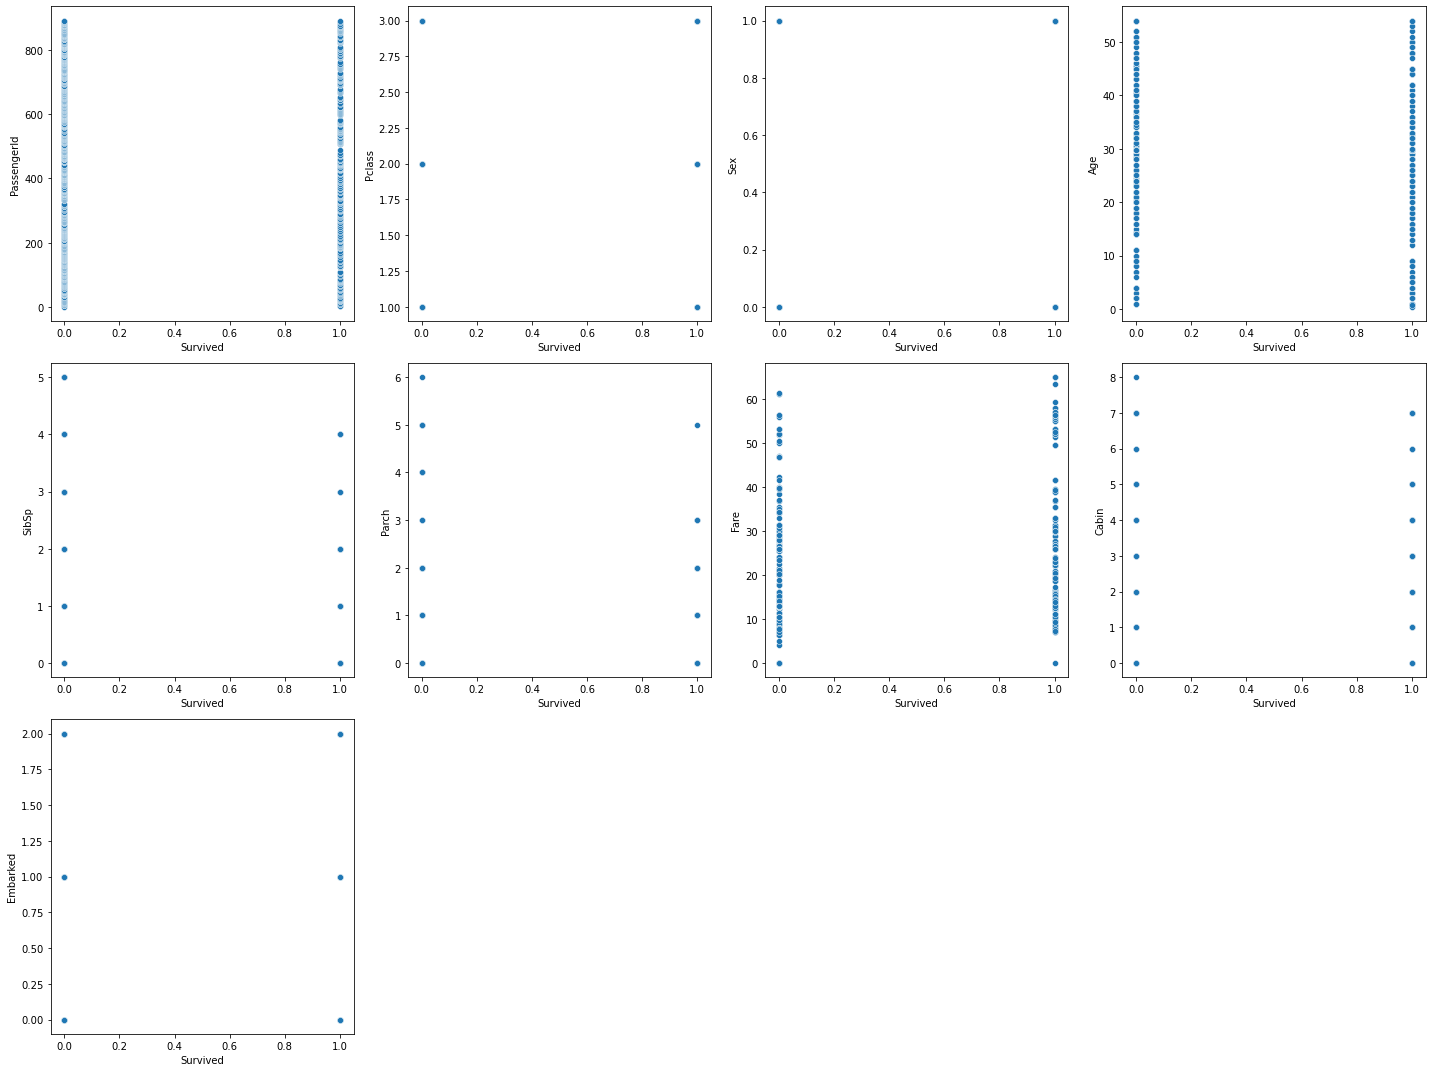

In [34]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in X :
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.scatterplot(Y,X[column])
        
    plotnumber+=1
plt.tight_layout()

# Checking Multicollinearity and mapping heatmap

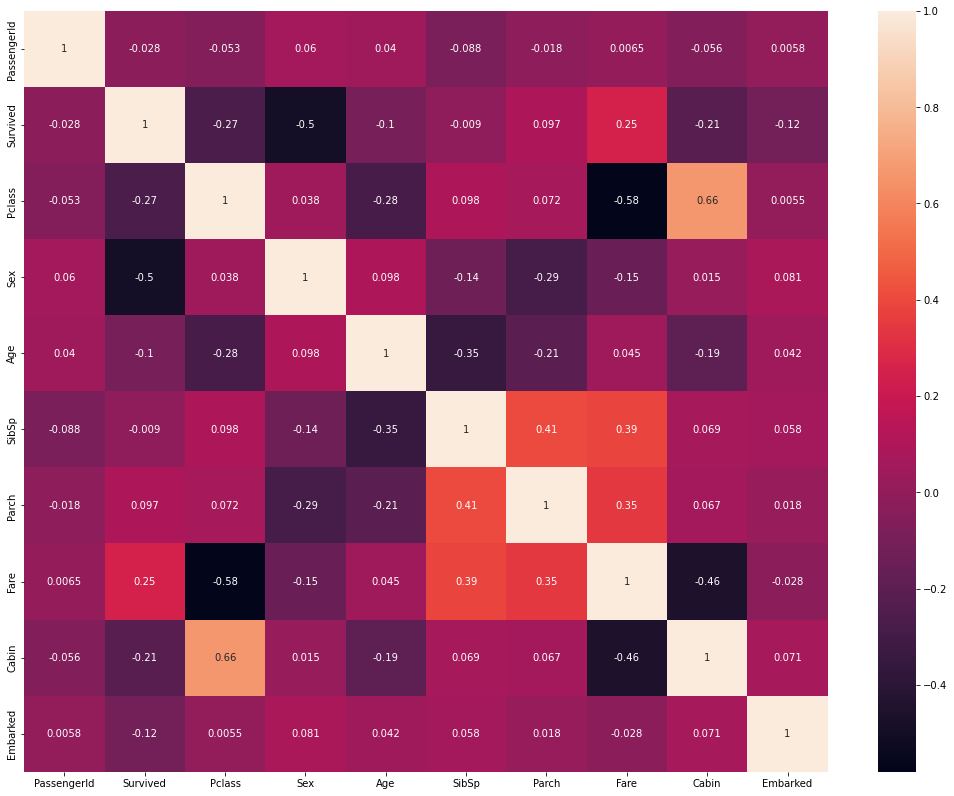

In [35]:
plt.figure(figsize=(18,14))
sns.heatmap(data.corr(), annot=True,annot_kws={'size':10})
plt.show()

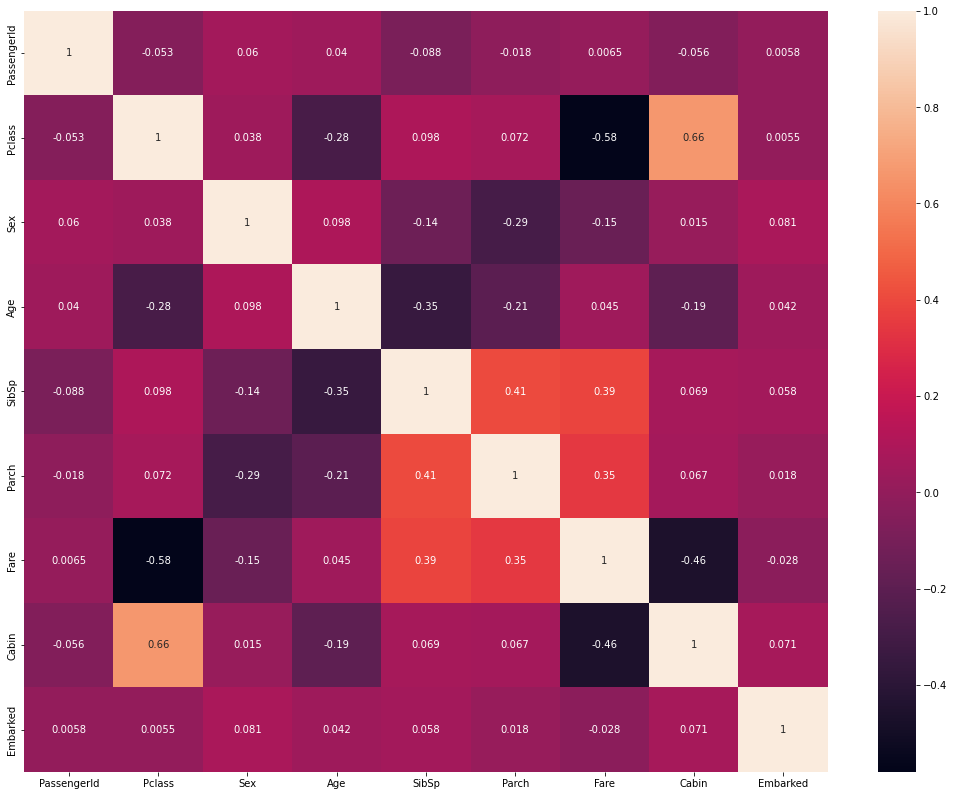

In [36]:
plt.figure(figsize=(18,14))
sns.heatmap(X.corr(), annot=True,annot_kws={'size':10})
plt.show()

### through heatmap we see it has no mullticollinearity in the data

## Splitting the data and building model

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0)

# Standarization of features 

In [38]:
from sklearn. model_selection import cross_val_score

In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', lr.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
    return lr, knn, svc_lin, svc_rbf, gauss, tree, forest


In [45]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.7666068222621185
[1]K Nearest Neighbor Training Accuracy: 0.8491921005385996
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7648114901256733
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8438061041292639
[4]Gaussian Naive Bayes Training Accuracy: 0.7630161579892281
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9784560143626571


In [56]:
# prediction probabilities
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr_probs = lr.predict(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)
knn_probs = knn.predict(X_test)

from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, Y_train)
svc_lin_probs = svc_lin.predict(X_test)

from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, Y_train)
svc_rbf_probs = svc_rbf.predict(X_test)


from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, Y_train)
gauss_probs = gauss.predict(X_test)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, Y_train)
tree_probs = tree.predict(X_test)


from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
forest_probs = forest.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
   #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line

[[106  15]
 [ 18  47]]
Model[0] Testing Accuracy = "0.8225806451612904 !"

[[107  14]
 [ 17  48]]
Model[1] Testing Accuracy = "0.8333333333333334 !"

[[104  17]
 [ 19  46]]
Model[2] Testing Accuracy = "0.8064516129032258 !"

[[110  11]
 [ 17  48]]
Model[3] Testing Accuracy = "0.8494623655913979 !"

[[107  14]
 [ 21  44]]
Model[4] Testing Accuracy = "0.8118279569892473 !"

[[99 22]
 [20 45]]
Model[5] Testing Accuracy = "0.7741935483870968 !"

[[112   9]
 [ 23  42]]
Model[6] Testing Accuracy = "0.8279569892473119 !"



In [60]:
cross_val_score(lr,X,Y,cv=5).mean()

0.7618265916923634

In [61]:
cross_val_score(knn,X,Y,cv=5).mean()

0.5370669327045166

In [62]:
cross_val_score(svc_lin,X,Y,cv=5).mean()

0.7631598040994014

In [63]:
cross_val_score(svc_rbf,X,Y,cv=5).mean()

0.6541084708869943

In [64]:
cross_val_score(gauss,X,Y,cv=5).mean()

0.7685652095048069

In [65]:
cross_val_score(tree,X,Y,cv=5).mean()

0.7230001813894431

In [66]:
cross_val_score(forest,X,Y,cv=5).mean()

0.8116361327770724

#### for model6 the the accuracy ,cross val score and confusion matrix score is good and relatively closer to each other. so, I'm selecting model 6 for hyperparameter tuning(random forest model) 

In [80]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [83]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
forest = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=0, n_jobs=-1)
clf = GridSearchCV(estimator=forest, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
best_param =clf.best_params_
print(best_param)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [86]:
# Random Forest
forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 4,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

forest.fit(X_train, Y_train)
Y_prediction = forest.predict(X_test)
forest.score(X_train, Y_train)

print("score:", round(forest.oob_score_, 4)*100, "%")

score: 80.07 %
